In [1]:
api_key = "YOUR_API_KEY_HERE"
api_secret = "YOUR_SECRET_HERE"

In [2]:
from binance.client import Client
print("python-binance 导入成功")


python-binance 导入成功


In [3]:
from binance.client import Client
import pandas as pd
from datetime import datetime

client = Client(api_key, api_secret)

# 获取最近30天BTCUSDT的日线K线数据
klines = client.get_historical_klines("BTCUSDT", Client.KLINE_INTERVAL_1DAY, "30 day ago UTC")

# 转换为DataFrame，字段顺序：开盘时间, 开盘价, 最高价, 最低价, 收盘价, 成交量, 结束时间等
df = pd.DataFrame(klines, columns=[
    "open_time", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])

# 把时间戳转成日期格式
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')

# 只保留关心的列
df = df[['open_time', 'open', 'high', 'low', 'close', 'volume']]

print(df.head())


   open_time            open            high             low           close  \
0 2025-12-09  90634.35000000  94588.99000000  89500.00000000  92678.80000000   
1 2025-12-10  92678.81000000  94476.00000000  91563.15000000  92015.37000000   
2 2025-12-11  92015.38000000  93555.00000000  89260.63000000  92513.38000000   
3 2025-12-12  92513.38000000  92754.00000000  89480.00000000  90268.42000000   
4 2025-12-13  90268.43000000  90634.55000000  89766.39000000  90240.01000000   

           volume  
0  21240.43014000  
1  18998.68083000  
2  19972.58758000  
3  16679.19169000  
4   5895.70788000  


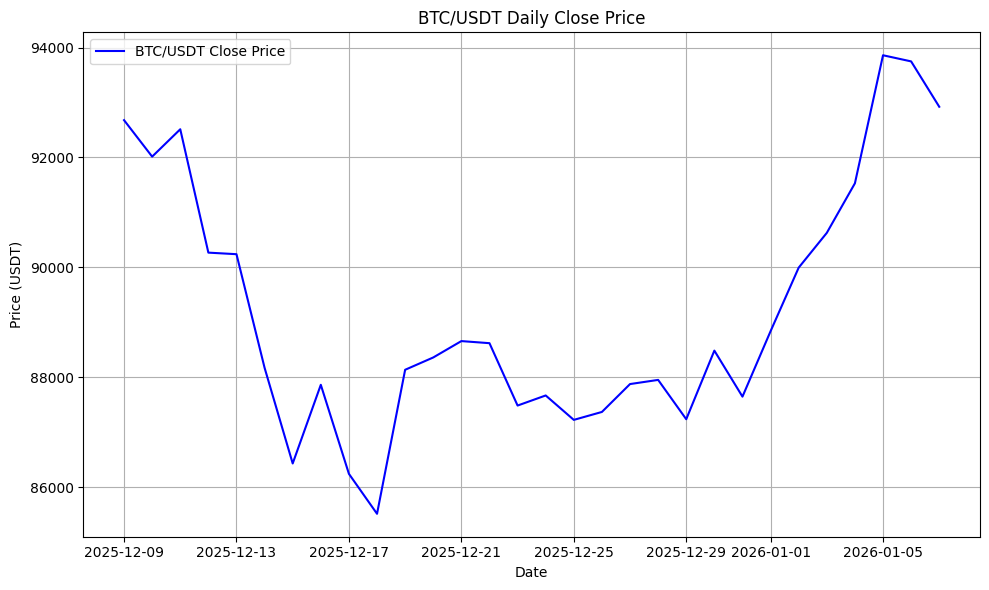

In [4]:
import matplotlib.pyplot as plt

# 把收盘价转换成浮点数（默认是字符串）
df['close'] = df['close'].astype(float)

# 画图
plt.figure(figsize=(10, 6))
plt.plot(df['open_time'], df['close'], label='BTC/USDT Close Price', color='blue')

plt.title('BTC/USDT Daily Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


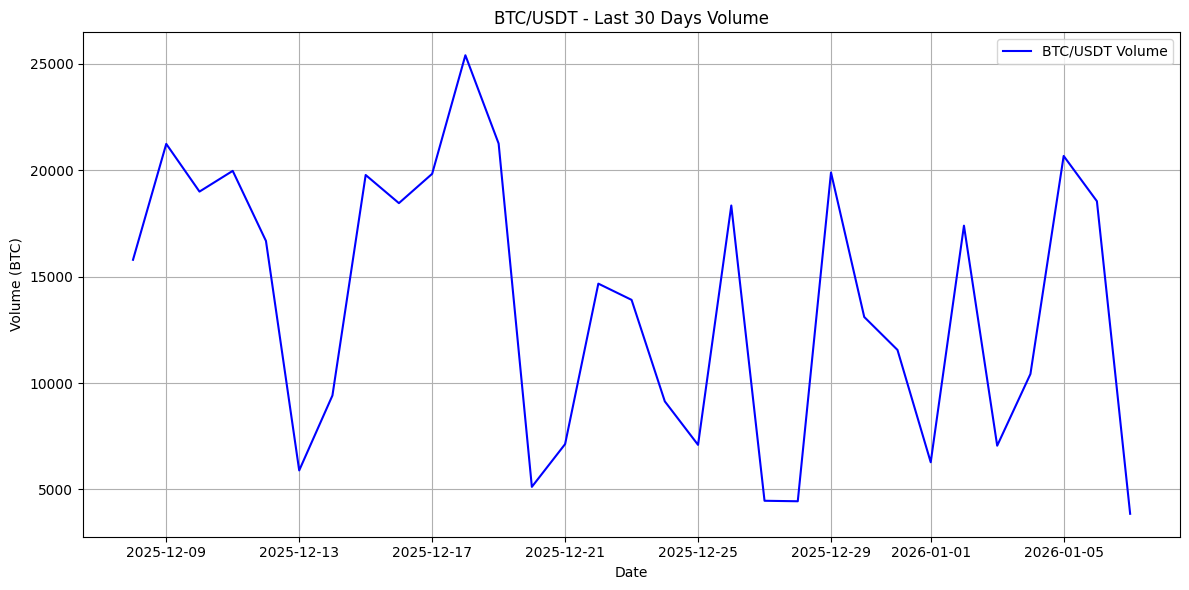

最近交易量日期: 2026-01-07
交易量: 3857.26592 BTC
交易量数据已保存到 btc_volume_30_days.csv


In [5]:
# ====== 导入依赖 ======
from binance.client import Client
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ====== 参数配置 ======
client = Client(api_key, api_secret)

symbol = "BTCUSDT"  # 比特币市场
days = 30  # 你想要的历史天数
interval = Client.KLINE_INTERVAL_1DAY  # 日K

# ====== 获取历史K线数据 ======
klines = client.get_historical_klines(
    symbol,
    interval,
    (datetime.now() - timedelta(days=days)).strftime("%Y-%m-%d"),
    datetime.now().strftime("%Y-%m-%d")
)

# 转为 DataFrame
df = pd.DataFrame(klines, columns=[
    'open_time', 'open', 'high', 'low', 'close', 'volume',
    'close_time', 'quote_asset_volume', 'number_of_trades',
    'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'
])

# 数据清洗
df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
df[['open', 'high', 'low', 'close', 'volume']] = df[['open', 'high', 'low', 'close', 'volume']].astype(float)

# ====== 绘制历史交易量曲线 ======
plt.figure(figsize=(12, 6))
plt.plot(df['open_time'], df['volume'], label='BTC/USDT Volume', color='blue')
plt.title(f'BTC/USDT - Last {days} Days Volume')
plt.xlabel('Date')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 打印最近交易量信息
latest = df.iloc[-1]
print(f"最近交易量日期: {latest['open_time'].strftime('%Y-%m-%d')}")
print(f"交易量: {latest['volume']} BTC")

# ====== 保存交易量数据到 CSV ======
volume_df = df[['open_time', 'volume']].copy()
csv_filename = f"btc_volume_{days}_days.csv"
volume_df.to_csv(csv_filename, index=False, encoding='utf-8-sig')
print(f"交易量数据已保存到 {csv_filename}")

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
抓取 Binance 公开最新价 → CSV
"""
from binance.client import Client
import pandas as pd
import time
import sys

# 1. 币名列表（不必写 USDT，脚本自动拼接）
CRYPTO_LIST = ["BTC", "ETH"]

# 2. 实例化 Client（公开接口，无需 key）
client = Client()

def fetch_prices(crypto_list):
    """返回 list[dict]：symbol & lastPrice"""
    prices = []
    tickers = client.get_symbol_ticker()          # 全市场快照
    symbol_map = {d["symbol"]: d["price"] for d in tickers}
    for coin in crypto_list:
        symbol = coin + "USDT"
        if symbol in symbol_map:
            prices.append({"symbol": symbol, "price": float(symbol_map[symbol])})
        else:
            print(f"[WARN] {symbol} not found in exchangeInfo", file=sys.stderr)
    return prices

def save_csv(prices, filename="prices.csv"):
    df = pd.DataFrame(prices, columns=["symbol", "price"])
    df.to_csv(filename, index=False, encoding="utf-8")
    print(f"✅ 已保存 {len(df)} 条记录 → {filename}")

def main():
    print("开始抓取 Binance 最新价...")
    prices = fetch_prices(CRYPTO_LIST)
    if not prices:
        print("❌ 未获取到任何价格，退出")
        return
    save_csv(prices)

if __name__ == "__main__":
    main()

开始抓取 Binance 最新价...


✅ 已保存 2 条记录 → prices.csv
